# Identitas Diri

Nama : Hasan Nur Wakhid

NIM  : A11.2021.13853

# Naive Bayes

# Menambahkan library
 "numpy" berguna memudahkan kita melakukan perhitungan saintifik seperti matriks, aljabar, statistik, dan sebagainya.    
 "matpotlib.pyplot" berguna untuk memvisualisaikan data melalui grafik atau diagram      
 "pandas" berguna untuk memproses data, mulai pembersihan data, manipulasi data, hingga melakukan analisis data.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Impor dataset
Memuat dataset serta memberikan nilai pada variabel x dan y (label) serta menampilkannya

In [35]:
dataset = pd.read_csv('examsMOD.csv')
X = dataset.iloc[:, [6, 7]].values
y = dataset.iloc[:, 4].values

In [36]:
print(X)

[[70 78]
 [93 87]
 [76 77]
 ...
 [86 86]
 [72 62]
 [47 45]]


In [37]:
print(y)

[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1
 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 1 0 1 0 

## Membagi dataset ke dalam Training set dan Test set
membagi data set ke 75 persen untuk training set dan 25 persen untuk testing set

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training model Naive Bayes pada Training set

In [40]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Membuat variabel prediksidan hasil tes set

In [41]:
y_pred = classifier.predict(X_test)

## Membuat Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[125  31]
 [ 55  39]]


## Memvisualisasikan hasil Training Set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


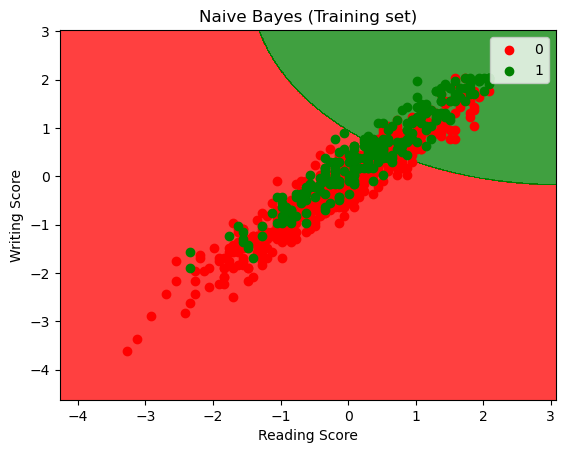

In [46]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.legend()
plt.show()

## Memvisualisasikan hasil Test Set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


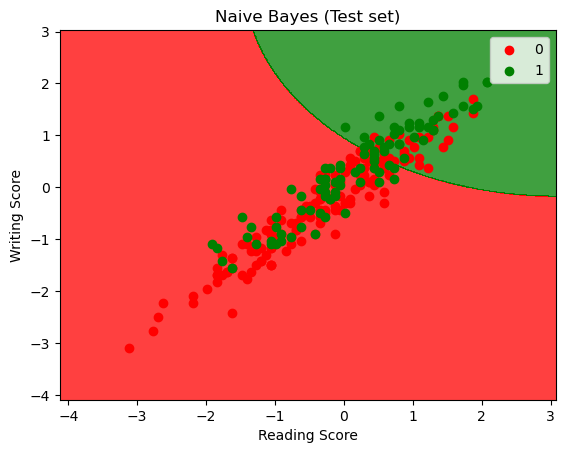

In [44]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.legend()
plt.show()